Installing and loading required packages.

In [1]:
if(!require(dplyr)) {install.packages("dplyr"); require(dplyr)}
if(!require(grid)) {install.packages("grid"); require(grid)}
if(!require(ggplot2)) {install.packages("ggplot2"); require(ggplot2)}
if(!require(lattice)) {install.packages("lattice"); require(lattice)}
if(!require(gridExtra)) {install.packages("gridExtra"); require(gridExtra)}
if(!require(tidyselect)) {install.packages("tidyselect"); require(tidyselect)}
if(!require(caTools)) {install.packages("caTools"); require(caTools)}
if(!require(nnet)) {install.packages("nnet"); require(nnet)}
if(!require(ROCR)) {install.packages("ROCR"); require(ROCR)}
if(!require(ISLR)) {install.packages("ISLR"); require(ISLR)}
if(!require(MASS)) {install.packages("MASS"); require(MASS)}
if(!require(corrplot)) {install.packages("corrplot"); require(corrplot)}
if(!require(caret)) {install.packages("caret"); require(caret)}
if(!require(class)) {install.packages("class"); require(class)}

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: grid
Loading required package: ggplot2
Loading required package: lattice
Loading required package: gridExtra

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: tidyselect

Attaching package: 'tidyselect'

The following objects are masked from 'package:dplyr':

    contains, ends_with, everything, matches, num_range, one_of,
    starts_with

Loading required package: caTools
Loading required package: nnet
Loading required package: ROCR
Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Loading required package: ISLR
Loading required package: MASS

Attaching package: 'MASS'

The followi

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shrut\AppData\Local\Temp\RtmpoJuS22\downloaded_packages


Loading required package: caret
Error: package or namespace load failed for 'caret' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called 'lme4'


Loading required data.

In [2]:
if(!require(data.table)) {install.packages("data.table"); require(data.table)}
loan_train <- fread("Train_data.csv")
loan_train = loan_train[,-1]

Loading required package: data.table

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



In [3]:
head(loan_train)

Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Male,No,0,Graduate,No,5849,0,NA,360,1,Urban,Y
Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y


In [4]:
#Cleaning missing and duplicate data
loan_train <- na.omit(loan_train)
loan_train <- loan_train[!duplicated(loan_train),]
loan_train$Loan_Status <- as.factor(loan_train$Loan_Status)

In [5]:
str(loan_train)

Classes 'data.table' and 'data.frame':	529 obs. of  12 variables:
 $ Gender           : chr  "Male" "Male" "Male" "Male" ...
 $ Married          : chr  "Yes" "Yes" "Yes" "No" ...
 $ Dependents       : chr  "1" "0" "0" "0" ...
 $ Education        : chr  "Graduate" "Graduate" "Not Graduate" "Graduate" ...
 $ Self_Employed    : chr  "No" "Yes" "No" "No" ...
 $ ApplicantIncome  : int  4583 3000 2583 6000 5417 2333 3036 4006 12841 3200 ...
 $ CoapplicantIncome: num  1508 0 2358 0 4196 ...
 $ LoanAmount       : int  128 66 120 141 267 95 158 168 349 70 ...
 $ Loan_Amount_Term : int  360 360 360 360 360 360 360 360 360 360 ...
 $ Credit_History   : int  1 1 1 1 1 1 0 1 1 1 ...
 $ Property_Area    : chr  "Rural" "Urban" "Urban" "Urban" ...
 $ Loan_Status      : Factor w/ 2 levels "N","Y": 1 2 2 2 2 2 1 2 1 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


Checking Multicollinearity among variables.

In [6]:
loan_train_numeric <- select_if(loan_train, is.numeric)
cor_matrix <- cor(loan_train_numeric)

In [7]:
cor_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.00000000,-0.1226305807,0.57070849,-0.0628610527,-0.02377860
CoapplicantIncome,-0.12263058,1.0000000000,0.15915197,-0.0002895206,-0.01084714
LoanAmount,0.57070849,0.1591519703,1.00000000,0.0232391675,-0.01815573
Loan_Amount_Term,-0.06286105,-0.0002895206,0.02323917,1.0000000000,0.00865753
Credit_History,-0.02377860,-0.0108471425,-0.01815573,0.0086575296,1.00000000


As none of the correlations is close to 1, we can say that the quantitative variables do not show collinearity.

Descriptive analysis of the data.

In [8]:
summary(loan_train)
sapply(loan_train, sd)

    Gender            Married           Dependents         Education        
 Length:529         Length:529         Length:529         Length:529        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Self_Employed      ApplicantIncome CoapplicantIncome   LoanAmount   
 Length:529         Min.   :  150   Min.   :    0     Min.   :  9.0  
 Class :character   1st Qu.: 2900   1st Qu.:    0     1st Qu.:100.0  
 Mode  :character   Median : 3816   Median : 1086     Median :128.0  
                    Mean   : 5508   Mean   : 1542     Mean   :145.9  
                    3rd Qu.: 5815   3rd Qu.: 2232     3rd Qu.:167.0  
                    Max.   :81000   Max. 

Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"NAs introduced by coercion"Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"NAs introduced by coercion"Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"NAs introduced by coercion"Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"NAs introduced by coercion"Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"NAs introduced by coercion"Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"NAs introduced by coercion"Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
"Calling var(x) on a factor x is deprecated and will become an error.
  Use something like 'all(duplicated(x)[-1L])' to test for a constant vector."

Gender           Married        Dependents         Education 
               NA                NA                NA                NA 
    Self_Employed   ApplicantIncome CoapplicantIncome        LoanAmount 
               NA      6404.1323693      2524.2957969        84.1084088 
 Loan_Amount_Term    Credit_History     Property_Area       Loan_Status 
       64.8616622         0.3567591                NA         0.4621570

Loading required package: GGally

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


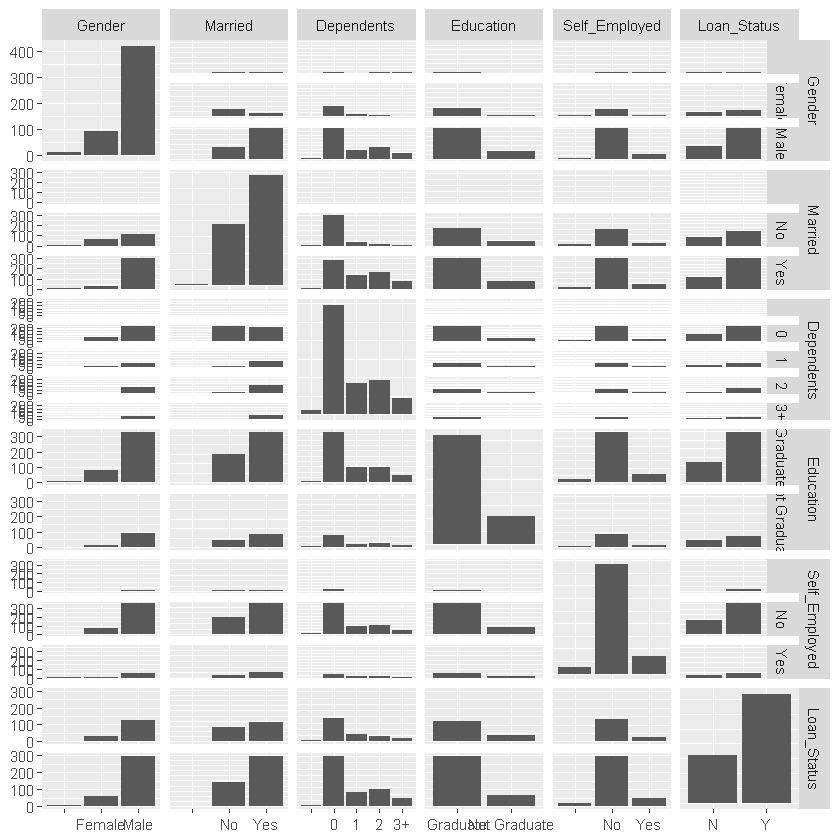

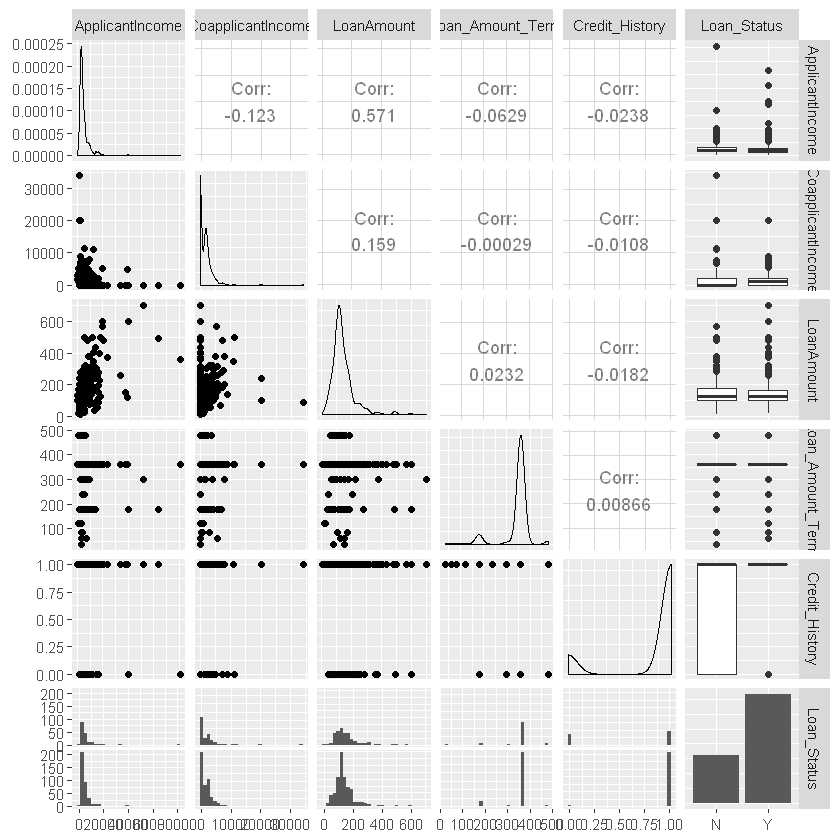

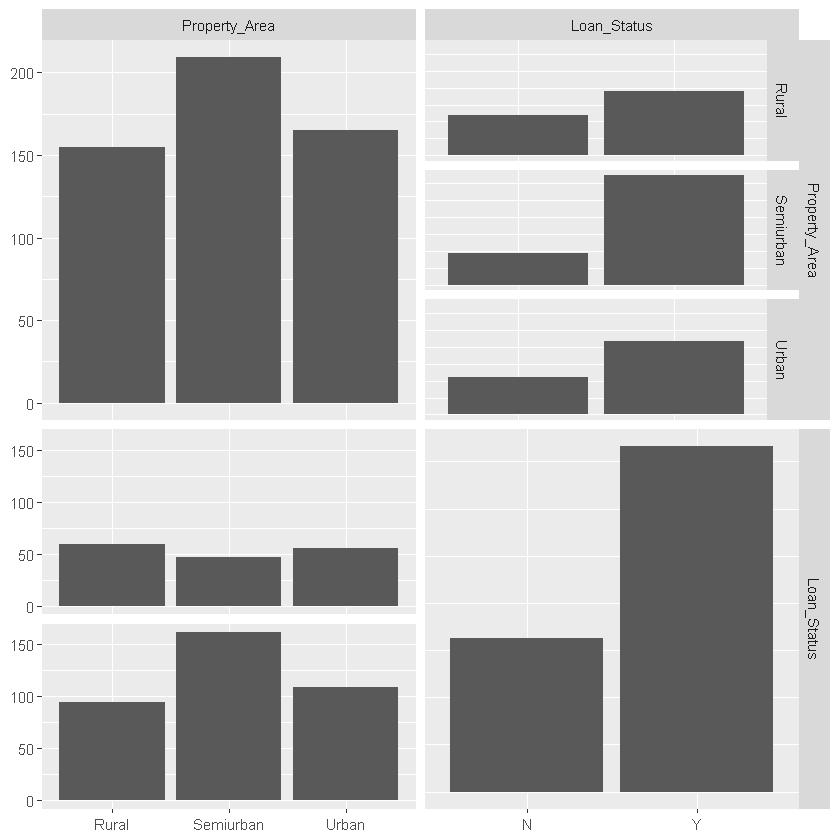

In [9]:
if(!require(GGally)) {install.packages("GGally"); require(GGally)}
pm <- ggpairs(loan_train, columns = c("Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Status"))
pm1 <- ggpairs(loan_train, columns = c("ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Loan_Status"))
pm2 <- ggpairs(loan_train, columns = 11:12)
pm
pm1
pm2

As we can see from the above paired plots, there are some variables which does not have high impact on the loan status, and these are ApplicantIncome, Loan_Amount_Term and Property_Area. Now we will fit a logistic regression model with all the variables and analyse the coefficients and verify that whether our descriptive analysis is in line with our model. We will split the data into training and test sets, with training set containing 75% of the observations and the test set containing 25% of the observations.

In [10]:
set.seed(123)
index = sample(1:nrow(loan_train), size = .75*nrow(loan_train))
train_data = loan_train[index,]
validation_data = loan_train[-index,]
glm_fit <- glm(Loan_Status ~ ., data = train_data, family = "binomial")
summary(glm_fit)


Call:
glm(formula = Loan_Status ~ ., family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2923  -0.4113   0.5099   0.7067   2.3808  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             1.295e+01  6.188e+02   0.021  0.98330    
GenderFemale           -1.325e+00  1.324e+00  -1.001  0.31692    
GenderMale             -8.628e-01  1.287e+00  -0.671  0.50249    
MarriedNo              -1.356e+01  6.188e+02  -0.022  0.98252    
MarriedYes             -1.305e+01  6.188e+02  -0.021  0.98317    
Dependents0             2.000e-01  1.088e+00   0.184  0.85416    
Dependents1            -3.692e-02  1.121e+00  -0.033  0.97373    
Dependents2             5.441e-01  1.115e+00   0.488  0.62540    
Dependents3+            3.042e-01  1.167e+00   0.261  0.79438    
EducationNot Graduate  -7.199e-01  3.311e-01  -2.174  0.02968 *  
Self_EmployedNo        -5.535e-01  6.091e-01  -0.909  0.36348    
S

In [11]:
glm.probs = predict(glm.fit, validation_data, type = "response")
glm.probs
contrasts(validation_data$Loan_Status)
dim(validation_data)

1          2          3          4          5          6          7 
0.78611841 0.87610284 0.78611841 0.78611841 0.11875059 0.04770002 0.72440106 
         8          9         10         11         12         13         14 
0.78611841 0.87610284 0.78611841 0.06545713 0.87610284 0.78611841 0.72440106 
        15         16         17         18         19         20         21 
0.78611841 0.04770002 0.78611841 0.78611841 0.11875059 0.87610284 0.87610284 
        22         23         24         25         26         27         28 
0.78611841 0.87610284 0.78611841 0.72440106 0.11875059 0.72440106 0.72440106 
        29         30         31         32         33         34         35 
0.06545713 0.78611841 0.78611841 0.72440106 0.87610284 0.04770002 0.87610284 
        36         37         38         39         40         41         42 
0.87610284 0.72440106 0.11875059 0.78611841 0.06545713 0.87610284 0.72440106 
        43         44         45         46         47         48         49 
0.87610284 0.78611841 0.78611841 0.72440106 0.87610284 0.87610284 0.87610284 
        50         51         52         53         54         55         56 
0.87610284 0.72440106 0.78611841 0.87610284 0.72440106 0.72440106 0.87610284 
        57         58         59         60         61         62         63 
0.87610284 0.87610284 0.06545713 0.72440106 0.87610284 0.72440106 0.78611841 
        64         65         66         67         68         69         70 
0.06545713 0.78611841 0.06545713 0.72440106 0.78611841 0.72440106 0.72440106 
        71         72         73         74         75         76         77 
0.72440106 0.78611841 0.72440106 0.72440106 0.78611841 0.78611841 0.78611841 
        78         79         80         81         82         83         84 
0.72440106 0.87610284 0.72440106 0.87610284 0.78611841 0.72440106 0.78611841 
        85         86         87         88         89         90         91 
0.72440106 0.87610284 0.72440106 0.72440106 0.78611841 0.11875059 0.78611841 
        92         93         94         95         96         97         98 
0.78611841 0.87610284 0.72440106 0.72440106 0.87610284 0.87610284 0.72440106 
        99        100        101        102        103        104        105 
0.87610284 0.87610284 0.78611841 0.87610284 0.87610284 0.87610284 0.87610284 
       106        107        108        109        110        111        112 
0.72440106 0.04770002 0.87610284 0.78611841 0.78611841 0.78611841 0.87610284 
       113        114        115        116        117        118        119 
0.87610284 0.78611841 0.78611841 0.87610284 0.72440106 0.78611841 0.04770002 
       120        121        122        123        124        125        126 
0.87610284 0.87610284 0.78611841 0.06545713 0.78611841 0.11875059 0.04770002 
       127        128        129        130        131        132        133 
0.87610284 0.72440106 0.11875059 0.78611841 0.87610284 0.72440106 0.78611841

,Y
N,0
Y,1


[1] 133  12

In [12]:
glm.pred = rep("N", 133)
glm.pred[glm.probs >.7] = "Y"
glm.pred = as.factor(glm.pred)
table(glm.pred, validation_data$Loan_Status)
mean(glm.pred != validation_data$Loan_Status)

        
glm.pred  N  Y
       N 19  1
       Y 20 93

[1] 0.1578947

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7382706


Slot "alpha.values":
list()


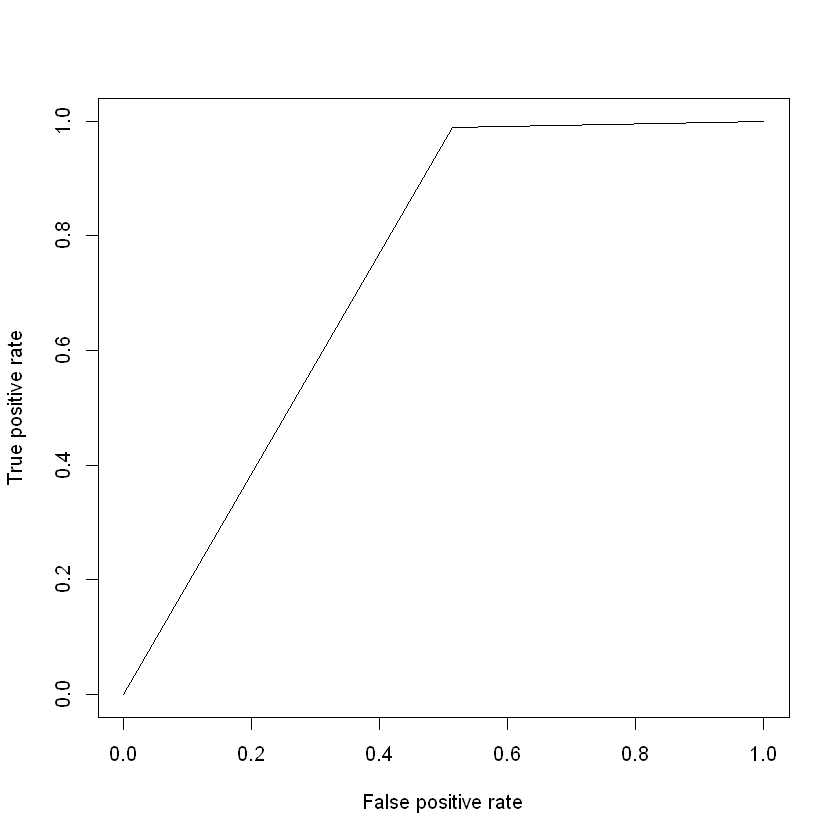

In [13]:
pred<-prediction(as.numeric(glm.pred), as.numeric(validation_data$Loan_Status))
perf<-performance(pred,"tpr", "fpr")
plot(perf)
auc<- performance(pred,"auc")
auc

As we can see from the summary of the above model, the variables which are significant in the prediction of the loan status are Credit_History and Property_Area. Now we will carry out the stepwise regression to check the significance of other predictors. To carry out the backwards stepwise regression, we will use the glm_fit model and do a stepwise regression on it. To carry out the forward stepwise regression, we will develop a linear regression model with no predictors and then carry out the stepwise regression between the model with no predictors and glm_fit. We will also carry out a stepwise regression bothways.

In [14]:
glm_nothing <- glm(Loan_Status ~ 1, data = train_data, family = "binomial")
summary(glm_nothing)


Call:
glm(formula = Loan_Status ~ 1, family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5239  -1.5239   0.8667   0.8667   0.8667  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.7855     0.1084   7.249 4.18e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 492.29  on 395  degrees of freedom
Residual deviance: 492.29  on 395  degrees of freedom
AIC: 494.29

Number of Fisher Scoring iterations: 4


In [15]:
glm_backward <- step(glm_fit)
summary(glm_backward)

Start:  AIC=396.69
Loan_Status ~ Gender + Married + Dependents + Education + Self_Employed + 
    ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + 
    Credit_History + Property_Area

                    Df Deviance    AIC
- Dependents         4   360.25 390.25
- Self_Employed      2   359.76 393.76
- ApplicantIncome    1   358.72 394.72
- Gender             2   360.78 394.78
- Loan_Amount_Term   1   359.25 395.25
- CoapplicantIncome  1   359.56 395.56
- Married            2   361.92 395.92
- LoanAmount         1   360.67 396.67
<none>                   358.69 396.69
- Education          1   363.31 399.31
- Property_Area      2   367.61 401.61
- Credit_History     1   462.97 498.97

Step:  AIC=390.25
Loan_Status ~ Gender + Married + Education + Self_Employed + 
    ApplicantIncome + CoapplicantIncome + LoanAmount + Loan_Amount_Term + 
    Credit_History + Property_Area

                    Df Deviance    AIC
- Self_Employed      2   361.30 387.30
- ApplicantIncome 


Call:
glm(formula = Loan_Status ~ Married + Education + LoanAmount + 
    Credit_History + Property_Area, family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2387  -0.4353   0.5519   0.7020   2.4091  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             10.947700 616.196619   0.018  0.98583    
MarriedNo              -13.448943 616.196362  -0.022  0.98259    
MarriedYes             -12.781761 616.196353  -0.021  0.98345    
EducationNot Graduate   -0.645252   0.318792  -2.024  0.04296 *  
LoanAmount              -0.002648   0.001523  -1.739  0.08207 .  
Credit_History           3.605052   0.464219   7.766 8.11e-15 ***
Property_AreaSemiurban   0.835046   0.322929   2.586  0.00971 ** 
Property_AreaUrban       0.111892   0.323495   0.346  0.72943    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    

                 
glm.pred_backward  N  Y
                N 23 19
                Y 16 75

[1] 0.2631579

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.693808


Slot "alpha.values":
list()


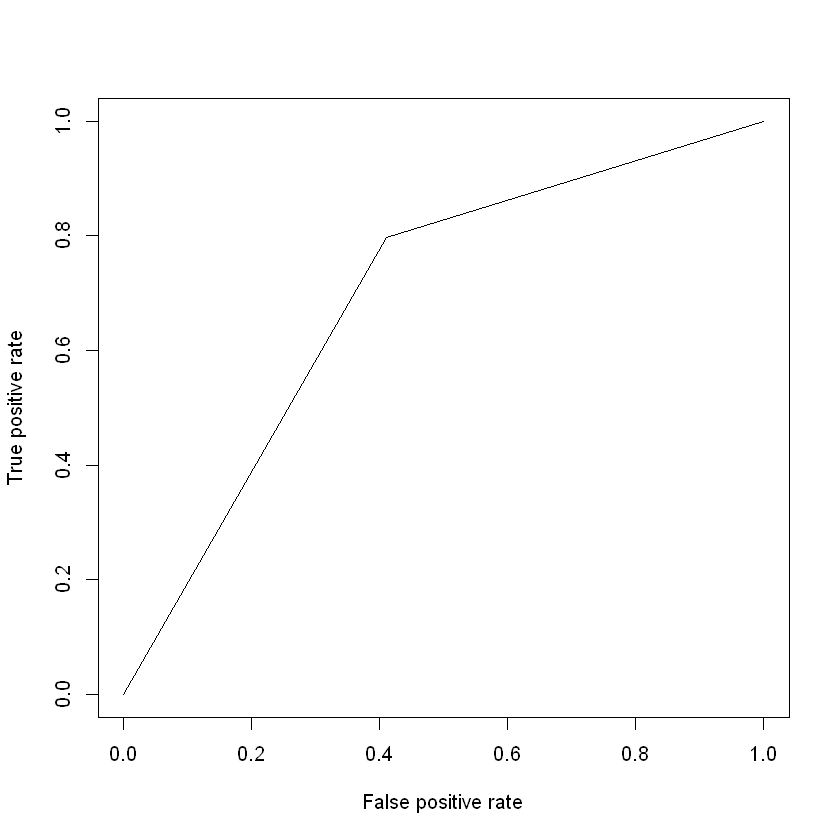

In [16]:
glm.probs_backward = predict(glm_backward, validation_data, type = "response")
glm.pred_backward = rep("N", 133)
glm.pred_backward[glm.probs_backward >.7] = "Y"
glm.pred_backward = as.factor(glm.pred_backward)
table(glm.pred_backward, validation_data$Loan_Status)
mean(glm.pred_backward != validation_data$Loan_Status)
pred_backward<-prediction(as.numeric(glm.pred_backward), as.numeric(validation_data$Loan_Status))
perf_backward<-performance(pred_backward,"tpr", "fpr")
plot(perf_backward)
auc_backward<- performance(pred_backward,"auc")
auc_backward

In [17]:
glm_forward <-  step(glm_nothing, scope=list(lower=formula(glm_nothing),upper=formula(glm_fit)), direction="forward")
summary(glm_forward)

Start:  AIC=494.29
Loan_Status ~ 1

                    Df Deviance    AIC
+ Credit_History     1   385.81 389.81
+ Property_Area      2   483.85 489.85
+ Education          1   487.85 491.85
+ Married            2   487.86 493.86
+ LoanAmount         1   490.24 494.24
<none>                   492.29 494.29
+ Gender             2   489.41 495.41
+ ApplicantIncome    1   491.51 495.51
+ Loan_Amount_Term   1   491.90 495.90
+ CoapplicantIncome  1   492.03 496.03
+ Self_Employed      2   490.60 496.60
+ Dependents         4   491.22 501.22

Step:  AIC=389.81
Loan_Status ~ Credit_History

                    Df Deviance    AIC
+ Property_Area      2   376.35 384.35
+ Married            2   380.34 388.34
+ Education          1   382.48 388.48
<none>                   385.81 389.81
+ Gender             2   382.46 390.46
+ LoanAmount         1   384.58 390.58
+ Loan_Amount_Term   1   384.93 390.93
+ CoapplicantIncome  1   385.12 391.12
+ ApplicantIncome    1   385.78 391.78
+ Self_Employed   


Call:
glm(formula = Loan_Status ~ Credit_History + Property_Area + 
    Married + Education + LoanAmount, family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2387  -0.4353   0.5519   0.7020   2.4091  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             10.947700 616.196619   0.018  0.98583    
Credit_History           3.605052   0.464219   7.766 8.11e-15 ***
Property_AreaSemiurban   0.835046   0.322929   2.586  0.00971 ** 
Property_AreaUrban       0.111892   0.323495   0.346  0.72943    
MarriedNo              -13.448943 616.196362  -0.022  0.98259    
MarriedYes             -12.781761 616.196353  -0.021  0.98345    
EducationNot Graduate   -0.645252   0.318792  -2.024  0.04296 *  
LoanAmount              -0.002648   0.001523  -1.739  0.08207 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    

                
glm.pred_forward  N  Y
               N 23 19
               Y 16 75

[1] 0.2631579

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.693808


Slot "alpha.values":
list()


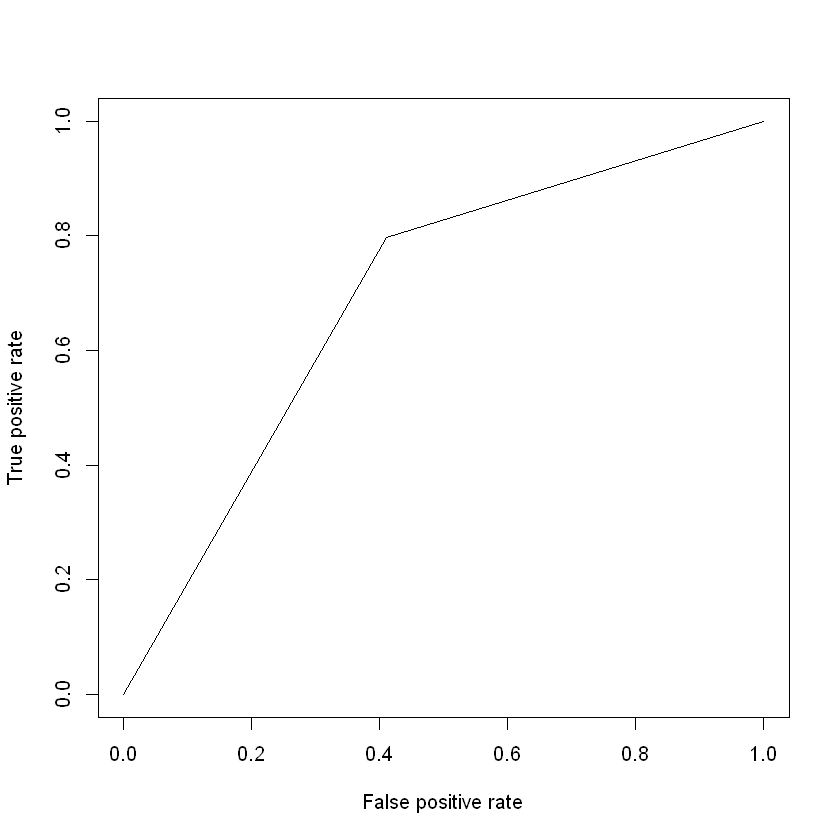

In [18]:
glm.probs_forward = predict(glm_forward, validation_data, type = "response")
glm.pred_forward = rep("N", 133)
glm.pred_forward[glm.probs_forward >.7] = "Y"
glm.pred_forward = as.factor(glm.pred_forward)
table(glm.pred_forward, validation_data$Loan_Status)
mean(glm.pred_forward != validation_data$Loan_Status)
pred_forward<-prediction(as.numeric(glm.pred_forward), as.numeric(validation_data$Loan_Status))
perf_forward<-performance(pred_forward,"tpr", "fpr")
plot(perf_forward)
auc_forward<- performance(pred_forward,"auc")
auc_forward

In [19]:
glm_bothways = step(glm_nothing, list(lower=formula(glm_nothing),upper=formula(glm_fit)), direction="both", trace = 0)
summary(glm_bothways)


Call:
glm(formula = Loan_Status ~ Credit_History + Property_Area + 
    Married + Education + LoanAmount, family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2387  -0.4353   0.5519   0.7020   2.4091  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             10.947700 616.196619   0.018  0.98583    
Credit_History           3.605052   0.464219   7.766 8.11e-15 ***
Property_AreaSemiurban   0.835046   0.322929   2.586  0.00971 ** 
Property_AreaUrban       0.111892   0.323495   0.346  0.72943    
MarriedNo              -13.448943 616.196362  -0.022  0.98259    
MarriedYes             -12.781761 616.196353  -0.021  0.98345    
EducationNot Graduate   -0.645252   0.318792  -2.024  0.04296 *  
LoanAmount              -0.002648   0.001523  -1.739  0.08207 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    

                 
glm.pred_bothways  N  Y
                N 23 19
                Y 16 75

[1] 0.2631579

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.693808


Slot "alpha.values":
list()


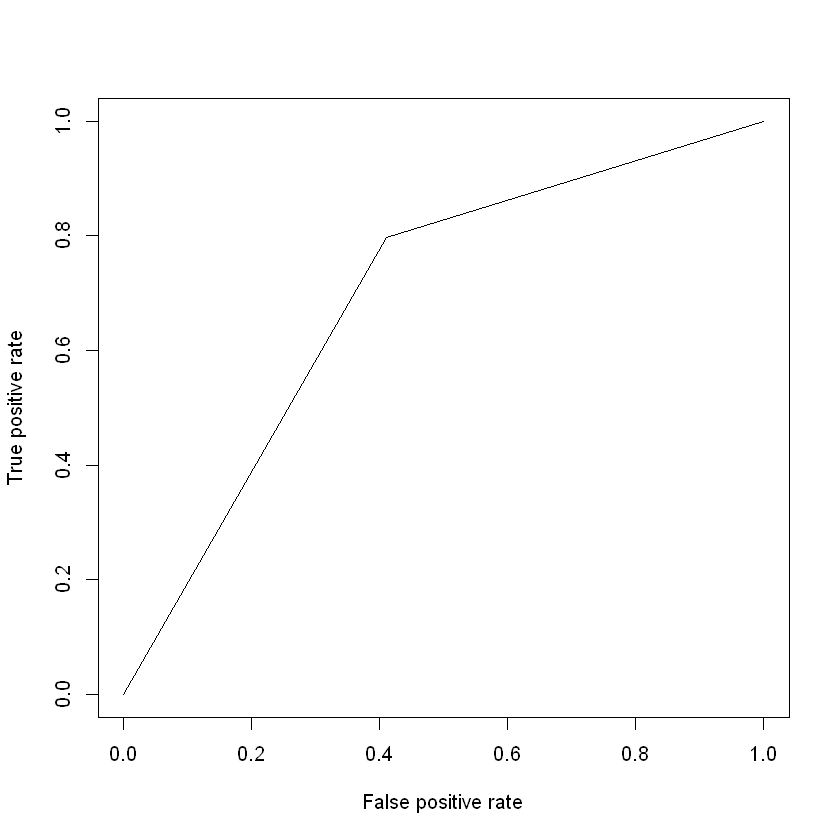

In [20]:
glm.probs_bothways = predict(glm_bothways, validation_data, type = "response")
glm.pred_bothways = rep("N", 133)
glm.pred_bothways[glm.probs_bothways >.7] = "Y"
glm.pred_bothways = as.factor(glm.pred_bothways)
table(glm.pred_bothways, validation_data$Loan_Status)
mean(glm.pred_bothways != validation_data$Loan_Status)
pred_bothways<-prediction(as.numeric(glm.pred_bothways), as.numeric(validation_data$Loan_Status))
perf_bothways<-performance(pred_bothways,"tpr", "fpr")
plot(perf_bothways)
auc_bothways<- performance(pred_bothways,"auc")
auc_bothways

As you can see from all the above models, the predictors which are significant in the loan eligibility process are Credit_History and Property_Area. To check the fitness of the above models, Area Under Curve(AUC) of the Receiver Operating Characteristic(ROC) curve was calculated for each model and it was found that AUC was maximum for the model which was developed using all the predictors. But as we can see from the coefficients of all the models, the significant predictors are Credit_History and Property_Area. This implies that a non linear transformation or an interaction of Credit_History and Property_Area might be possible. We will now create a model with non linear transformations of these predictors, check it's fitness and finally we will carry out the regression using knn approach and see how well it predicts the loan eligibility. 

In [21]:
#Model with non-linear transformation
glm_nl_fit <- glm(Loan_Status ~ Credit_History + Property_Area + I(Credit_History^2), data = train_data, family = "binomial")
summary(glm_nl_fit)


Call:
glm(formula = Loan_Status ~ Credit_History + Property_Area + 
    I(Credit_History^2), family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9914  -0.4139   0.5443   0.7373   2.3397  

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -2.6702     0.4865  -5.488 4.06e-08 ***
Credit_History           3.5783     0.4589   7.797 6.33e-15 ***
Property_AreaSemiurban   0.9267     0.3171   2.922  0.00348 ** 
Property_AreaUrban       0.2558     0.3146   0.813  0.41612    
I(Credit_History^2)          NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 492.29  on 395  degrees of freedom
Residual deviance: 376.35  on 392  degrees of freedom
AIC: 384.35

Number of Fisher Scoring iterations: 4


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

           
glm.pred_nl  N  Y
          N 19  1
          Y 20 93

[1] 0.1578947

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7382706


Slot "alpha.values":
list()


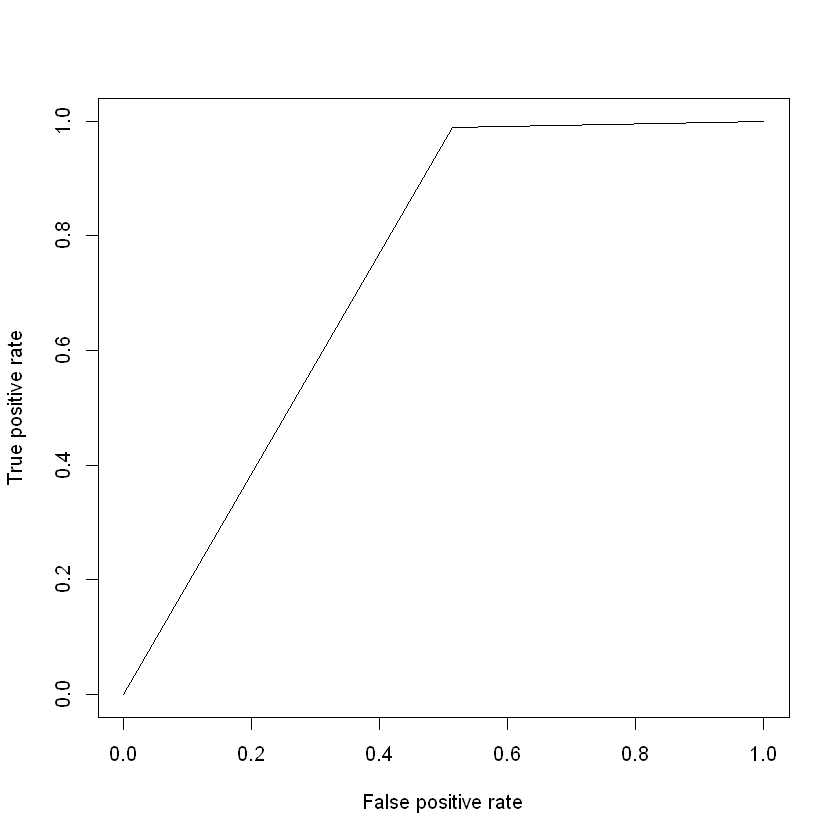

In [22]:
glm.probs_nl = predict(glm_nl_fit, validation_data, type = "response")
glm.pred_nl = rep("N", 133)
glm.pred_nl[glm.probs_nl >.7] = "Y"
glm.pred_nl = as.factor(glm.pred_nl)
table(glm.pred_nl, validation_data$Loan_Status)
mean(glm.pred_nl != validation_data$Loan_Status)
pred_nl<-prediction(as.numeric(glm.pred_nl), as.numeric(validation_data$Loan_Status))
perf_nl<-performance(pred_nl,"tpr", "fpr")
plot(perf_nl)
auc_nl<- performance(pred_nl,"auc")
auc_nl


Call:
glm(formula = Loan_Status ~ Credit_History + Property_Area + 
    Credit_History:Property_Area, family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9986  -0.4854   0.5401   0.7272   2.4267  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                            -2.0794     0.7500  -2.773 0.005561 ** 
Credit_History                          2.9463     0.7820   3.768 0.000165 ***
Property_AreaSemiurban                  0.2336     0.9739   0.240 0.810425    
Property_AreaUrban                     -0.8109     1.2720  -0.638 0.523784    
Credit_History:Property_AreaSemiurban   0.7509     1.0288   0.730 0.465429    
Credit_History:Property_AreaUrban       1.1394     1.3129   0.868 0.385479    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 492.29  on 395  degrees of fre

            
glm.pred_int  N  Y
           N 19  1
           Y 20 93

[1] 0.1578947

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7382706


Slot "alpha.values":
list()


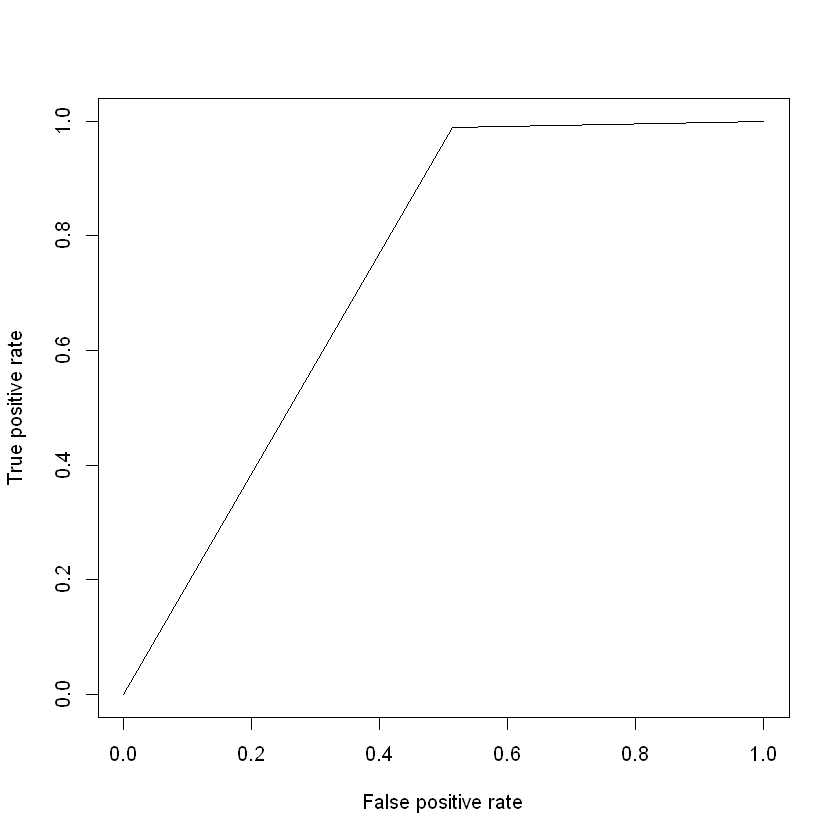

In [23]:
#Model with non-linear transformation
glm_int_fit <- glm(Loan_Status ~ Credit_History + Property_Area + Credit_History:Property_Area, data = train_data, family = "binomial")
summary(glm_int_fit)
glm.probs_int = predict(glm_int_fit, validation_data, type = "response")
glm.pred_int = rep("N", 133)
glm.pred_int[glm.probs_int >.7] = "Y"
glm.pred_int = as.factor(glm.pred_int)
table(glm.pred_int, validation_data$Loan_Status)
mean(glm.pred_int != validation_data$Loan_Status)
pred_int<-prediction(as.numeric(glm.pred_int), as.numeric(validation_data$Loan_Status))
perf_int<-performance(pred_int,"tpr", "fpr")
plot(perf_int)
auc_int<- performance(pred_int,"auc")
auc_int

As we can see the interaction terms and non-linear transformations does not increase the AUC of the ROC curve. Now we will develop a knn model and check it's fitness.

In [128]:
#Converting all predictors to numeric
loan_train$Property_Area <- as.numeric(as.factor(loan_train$Property_Area))
train_knn = cbind(Credit_History, Property_Area)[index,]
test_knn = cbind(Credit_History, Property_Area)[-index,]
train.Loan_Status <- loan_train$Loan_Status[index]

        
knn.pred  N  Y
       N 19  1
       Y 20 93

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.7382706


Slot "alpha.values":
list()


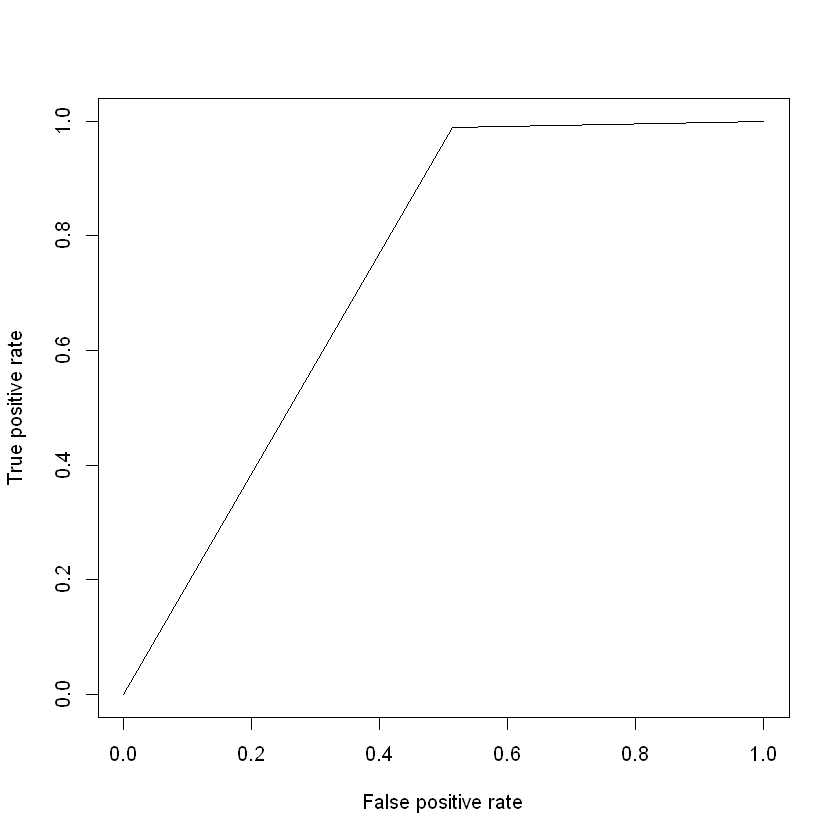

In [129]:
set.seed(1)
knn.pred = knn(train = train_knn, test = test_knn, cl = train.Loan_Status, k=1)
table(knn.pred, validation_data$Loan_Status)
pred_knn<-prediction(as.numeric(knn.pred), as.numeric(validation_data$Loan_Status))
perf_knn<-performance(pred_knn,"tpr", "fpr")
plot(perf_knn)
auc_knn<- performance(pred_knn,"auc")
auc_knn

In [131]:
if(!require(caret)) {install.packages("caret"); require(caret)}
if(!require(lme4)) {install.packages("lme4"); require(lme4)}
if(!require(mgcv)) {install.packages("mgcv"); require(mgcv)}

Loading required package: caret
Error: package or namespace load failed for 'caret' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'mgcv'


package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shrut\AppData\Local\Temp\RtmpoJuS22\downloaded_packages


Loading required package: caret
Error: package or namespace load failed for 'caret' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'mgcv'
Loading required package: mgcv
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'mgcv'"

package 'mgcv' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\shrut\AppData\Local\Temp\RtmpoJuS22\downloaded_packages


Loading required package: mgcv
Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-19. For overview type 'help("mgcv-package")'.

Attaching package: 'mgcv'

The following object is masked from 'package:nnet':

    multinom



In [132]:
# Setting up train controls
repeats = 3
numbers = 10
tunel = 10

set.seed(1234)
x = trainControl(method = 'repeatedcv',
                 number = numbers,
                 repeats = repeats,
                 classProbs = TRUE,
                 summaryFunction = twoClassSummary)

model1 <- train(Loan_Status ~ Credit_History + Property_Area , data = train_data, method = 'knn',
                preProcess = c('center','scale'),
                trControl = x,
                metric = 'ROC',
                tuneLength = tunel)

# Summary of model
model1
plot(model1)

# Validation
valid_pred <- predict(model1,validation_data, type = 'prob')

#Storing Model Performance Scores
library(ROCR)
pred_val <-prediction(valid_pred[,2],validation_data$Loan_Status)

# Calculating Area under Curve (AUC)
perf_val <- performance(pred_val,'auc')
perf_val

# Plot AUC
perf_val <- performance(pred_val, 'tpr', 'fpr')
plot(perf_val, col = 'green', lwd = 1.5)

ERROR: Error in trainControl(method = "repeatedcv", number = numbers, repeats = repeats, : could not find function "trainControl"
